In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix,precision_score,recall_score,classification_report

#### Data Analysis and Preprocessing

In [183]:
df1 = pd.read_csv('supermarket-sales-data.csv')
df1

,InvoiceID,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
0,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,UPI,9.1
1,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,9.6
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,7.4
3,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,UPI,8.4
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,UPI,5.3
...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,UPI,6.2
996,303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,UPI,4.4
997,727-02-1313,A,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,7.7
998,347-56-2442,A,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,4.1


In [184]:
df1.shape

(1000, 11)

In [185]:
df1.dtypes

InvoiceID        object
Branch           object
CustomerType     object
Gender           object
ProductType      object
UnitPrice       float64
Quantity          int64
Tax             float64
Total           float64
PaymentType      object
Rating          float64
dtype: object

In [186]:
df1.describe()

,UnitPrice,Quantity,Tax,Total,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,6.97270
std,26.494628,2.923431,11.708825,245.885335,1.71858
min,10.080000,1.000000,0.508500,10.678500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,5.50000
50%,55.230000,5.000000,12.088000,253.848000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,10.00000


In [187]:
df1.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [188]:
df1.isna().sum()

InvoiceID       0
Branch          0
CustomerType    0
Gender          0
ProductType     0
UnitPrice       0
Quantity        0
Tax             0
Total           0
PaymentType     0
Rating          0
dtype: int64

<Axes: >

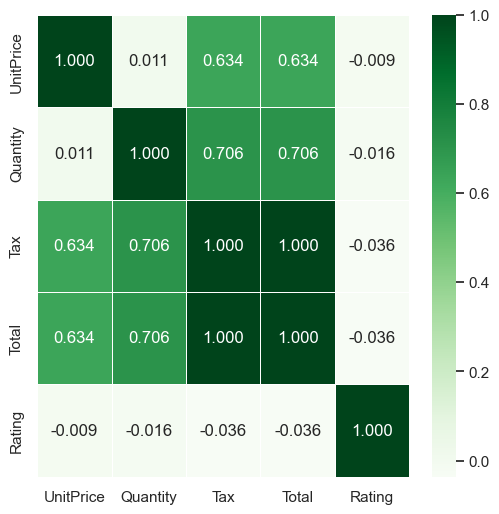

In [189]:
num_data = df1.iloc[:,1:].select_dtypes(include = ["int64","float64"])
sns.set_theme(rc={'figure.figsize':(6,6)})
sns.heatmap(num_data.corr(),annot=True,cmap="Greens",linewidths=0.4,fmt=".3f")

In [190]:
df1.columns

Index(['InvoiceID', 'Branch', 'CustomerType', 'Gender', 'ProductType',
       'UnitPrice', 'Quantity', 'Tax', 'Total', 'PaymentType', 'Rating'],
      dtype='object')

#### Encoding Data to numeric

In [191]:
enc = OneHotEncoder(sparse_output=False)
encoded_data = enc.fit_transform(df1[['Branch', 'CustomerType', 'ProductType', 'PaymentType']])
encoded_df = pd.DataFrame(
    encoded_data,columns= enc.get_feature_names_out(['Branch', 'CustomerType', 'ProductType', 'PaymentType'])
)

encoded_df

,Branch_A,Branch_B,Branch_C,CustomerType_Member,CustomerType_Normal,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
996,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
997,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [192]:
for cols in encoded_df:
    df1[cols] = encoded_df[cols]

df1

,InvoiceID,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,...,CustomerType_Normal,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI
0,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,UPI,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,UPI,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,UPI,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,UPI,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
996,303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,UPI,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
997,727-02-1313,A,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,347-56-2442,A,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [193]:
df1.drop(['Branch', 'CustomerType', 'ProductType', 'PaymentType'], axis=1, inplace=True)
df1

,InvoiceID,Gender,UnitPrice,Quantity,Tax,Total,Rating,Branch_A,Branch_B,Branch_C,...,CustomerType_Normal,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI
0,750-67-8428,Female,74.69,7,26.1415,548.9715,9.1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,226-31-3081,Female,15.28,5,3.8200,80.2200,9.6,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,631-41-3108,Male,46.33,7,16.2155,340.5255,7.4,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,123-19-1176,Male,58.22,8,23.2880,489.0480,8.4,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,373-73-7910,Male,86.31,7,30.2085,634.3785,5.3,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Male,40.35,1,2.0175,42.3675,6.2,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
996,303-96-2227,Female,97.38,10,48.6900,1022.4900,4.4,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
997,727-02-1313,Male,31.84,1,1.5920,33.4320,7.7,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,347-56-2442,Male,65.82,1,3.2910,69.1110,4.1,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [194]:
label_encoder = preprocessing.LabelEncoder()
df1['Gender']= label_encoder.fit_transform(df1['Gender'])
df1

,InvoiceID,Gender,UnitPrice,Quantity,Tax,Total,Rating,Branch_A,Branch_B,Branch_C,...,CustomerType_Normal,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI
0,750-67-8428,0,74.69,7,26.1415,548.9715,9.1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,226-31-3081,0,15.28,5,3.8200,80.2200,9.6,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,631-41-3108,1,46.33,7,16.2155,340.5255,7.4,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,123-19-1176,1,58.22,8,23.2880,489.0480,8.4,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,373-73-7910,1,86.31,7,30.2085,634.3785,5.3,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,1,40.35,1,2.0175,42.3675,6.2,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
996,303-96-2227,0,97.38,10,48.6900,1022.4900,4.4,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
997,727-02-1313,1,31.84,1,1.5920,33.4320,7.7,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,347-56-2442,1,65.82,1,3.2910,69.1110,4.1,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [195]:
df1.dtypes

InvoiceID                              object
Gender                                  int32
UnitPrice                             float64
Quantity                                int64
Tax                                   float64
Total                                 float64
Rating                                float64
Branch_A                              float64
Branch_B                              float64
Branch_C                              float64
CustomerType_Member                   float64
CustomerType_Normal                   float64
ProductType_Electronic accessories    float64
ProductType_Fashion accessories       float64
ProductType_Food and beverages        float64
ProductType_Health and beauty         float64
ProductType_Home and lifestyle        float64
ProductType_Sports and travel         float64
PaymentType_Cash                      float64
PaymentType_Credit card               float64
PaymentType_UPI                       float64
dtype: object

In [196]:
df1.shape

(1000, 21)

<Axes: >

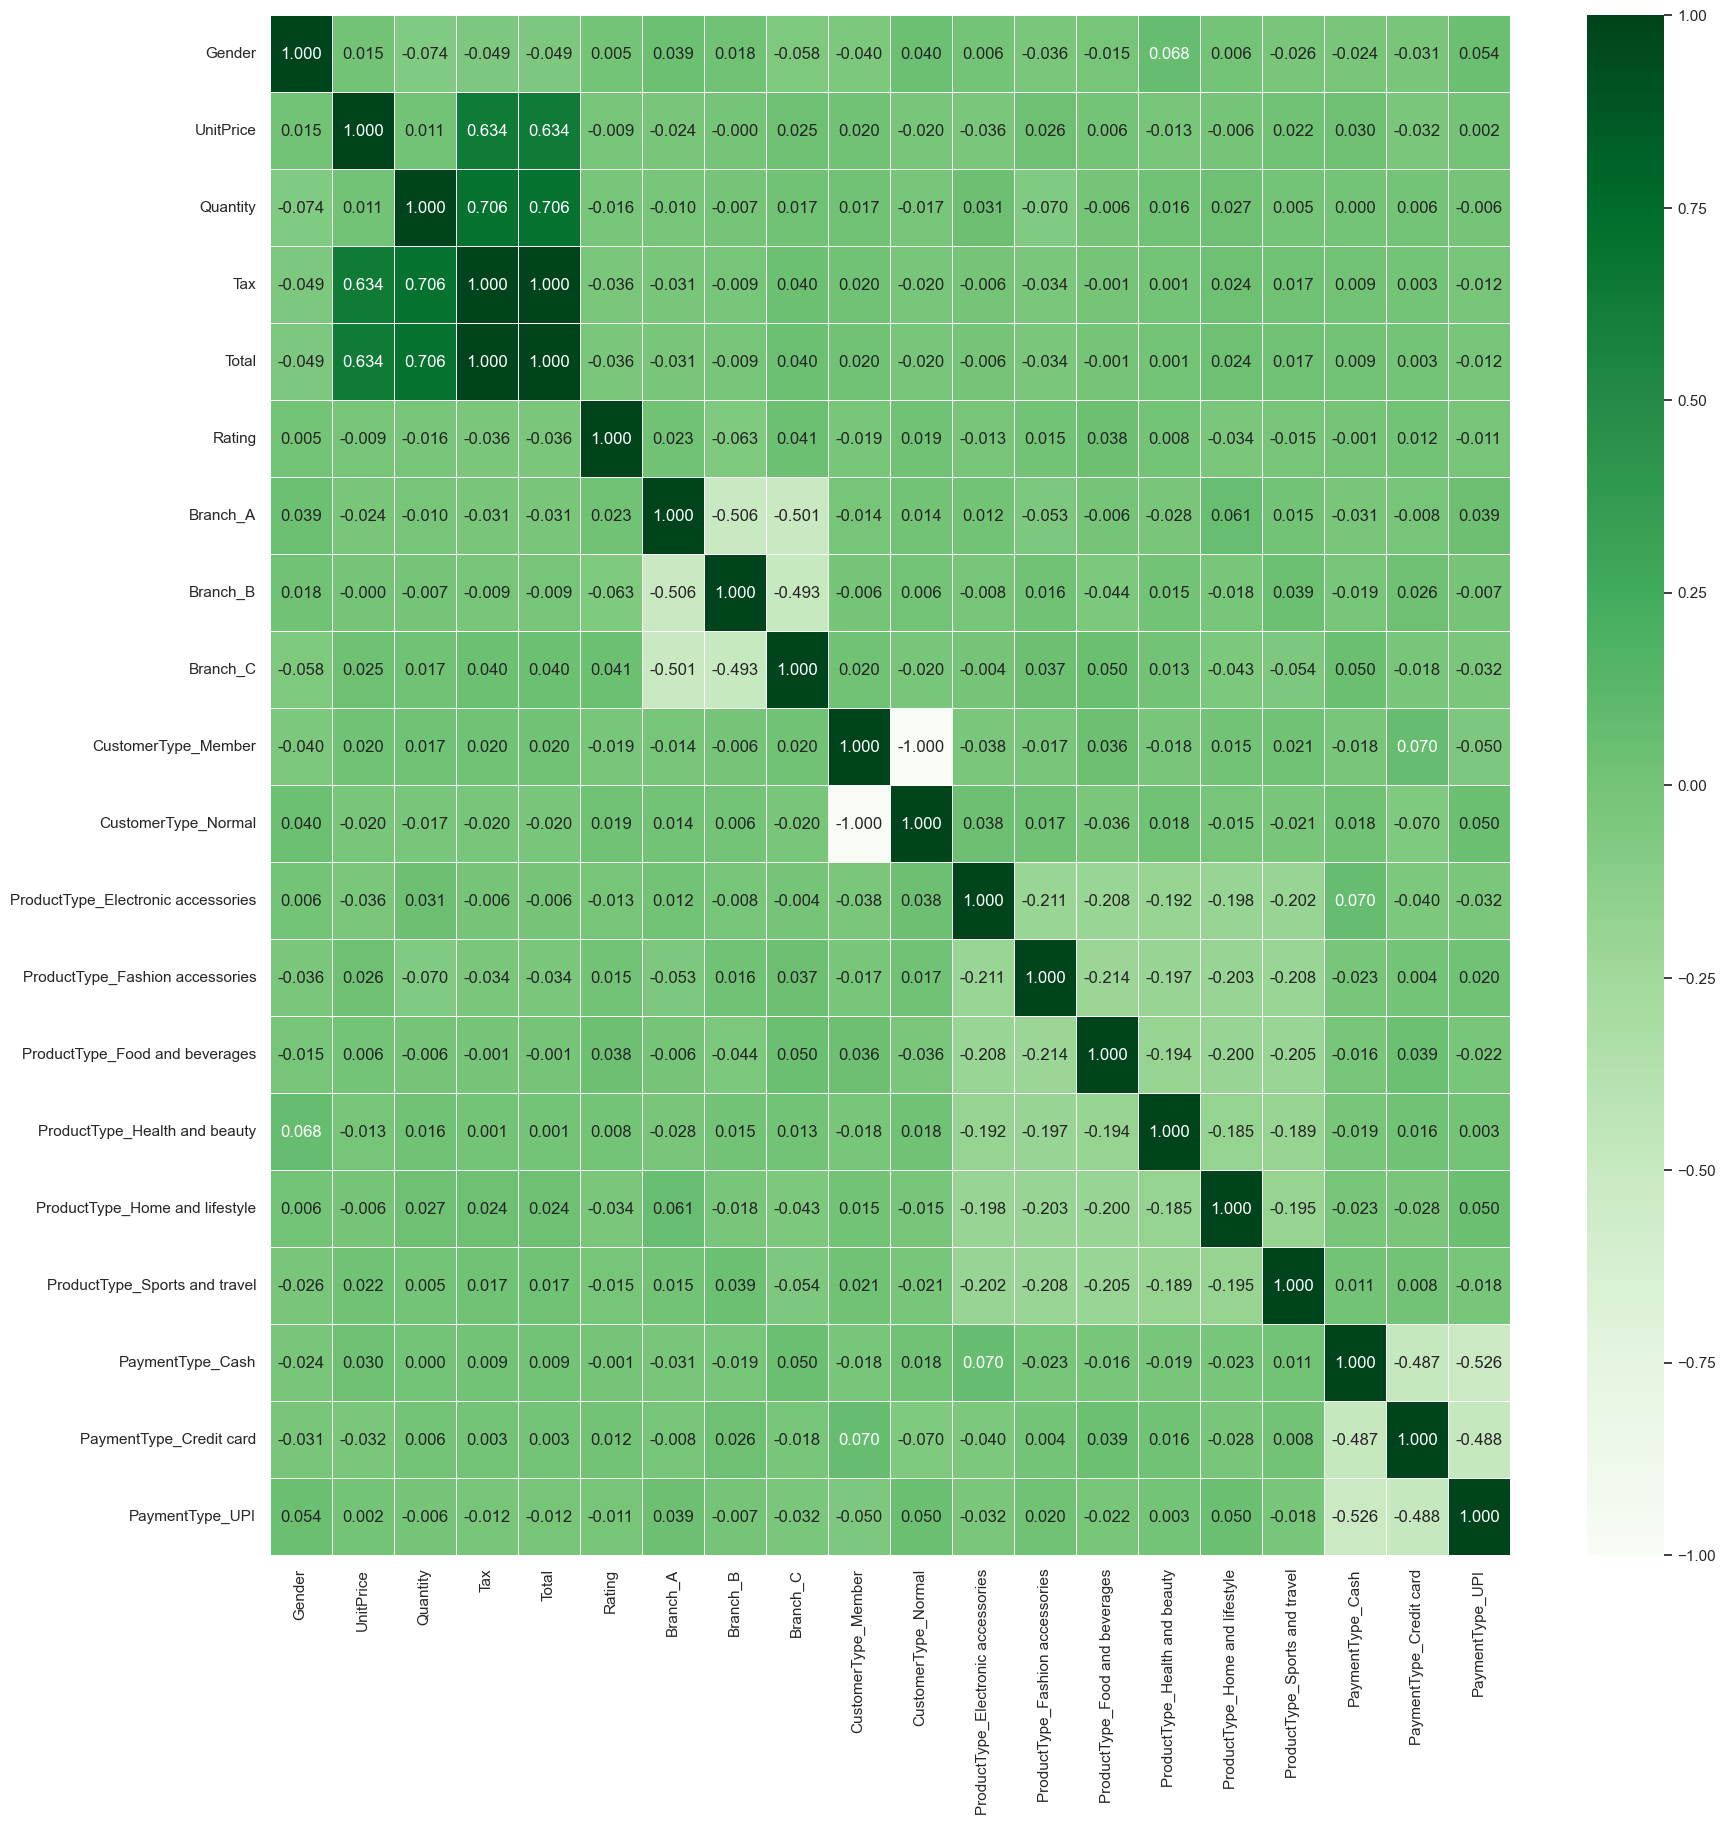

In [197]:
num_data = df1.iloc[:,1:].select_dtypes(include = ["int64","float64","int32"])
sns.set_theme(rc={'figure.figsize':(20,20)})
sns.heatmap(num_data.corr(),annot=True,cmap="Greens",linewidths=0.4,fmt=".3f")

#### 

In [198]:
df1.isna().sum()

InvoiceID                             0
Gender                                0
UnitPrice                             0
Quantity                              0
Tax                                   0
Total                                 0
Rating                                0
Branch_A                              0
Branch_B                              0
Branch_C                              0
CustomerType_Member                   0
CustomerType_Normal                   0
ProductType_Electronic accessories    0
ProductType_Fashion accessories       0
ProductType_Food and beverages        0
ProductType_Health and beauty         0
ProductType_Home and lifestyle        0
ProductType_Sports and travel         0
PaymentType_Cash                      0
PaymentType_Credit card               0
PaymentType_UPI                       0
dtype: int64

In [201]:
scaled_df = StandardScaler().fit_transform(df1.iloc[:,1:].values)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = df1.iloc[:,1:].columns
scaled_df

,Gender,UnitPrice,Quantity,Tax,Total,Rating,Branch_A,Branch_B,Branch_C,CustomerType_Member,CustomerType_Normal,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI
0,-0.998002,0.718160,0.509930,0.919607,0.919607,1.238443,1.393261,-0.704987,-0.698638,0.998002,-0.998002,-0.452570,-0.465344,-0.45897,2.361980,-0.436436,-0.44614,-0.724148,-0.671847,1.377879
1,-0.998002,-1.525303,-0.174540,-0.987730,-0.987730,1.529527,-0.717741,-0.704987,1.431356,-1.002002,1.002002,2.209605,-0.465344,-0.45897,-0.423374,-0.436436,-0.44614,1.380933,-0.671847,-0.725753
2,1.002002,-0.352781,0.509930,0.071446,0.071446,0.248760,1.393261,-0.704987,-0.698638,-1.002002,1.002002,-0.452570,-0.465344,-0.45897,-0.423374,2.291288,-0.44614,-0.724148,1.488433,-0.725753
3,1.002002,0.096214,0.852165,0.675780,0.675780,0.830927,1.393261,-0.704987,-0.698638,0.998002,-0.998002,-0.452570,-0.465344,-0.45897,2.361980,-0.436436,-0.44614,-0.724148,-0.671847,1.377879
4,1.002002,1.156959,0.509930,1.267125,1.267125,-0.973790,1.393261,-0.704987,-0.698638,-1.002002,1.002002,-0.452570,-0.465344,-0.45897,-0.423374,-0.436436,2.24145,-0.724148,-0.671847,1.377879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.002002,-0.578600,-1.543480,-1.141750,-1.141750,-0.449840,-0.717741,-0.704987,1.431356,-1.002002,1.002002,-0.452570,-0.465344,-0.45897,2.361980,-0.436436,-0.44614,-0.724148,-0.671847,1.377879
996,-0.998002,1.574989,1.536635,2.846340,2.846340,-1.497741,-0.717741,1.418467,-0.698638,-1.002002,1.002002,-0.452570,-0.465344,-0.45897,-0.423374,2.291288,-0.44614,-0.724148,-0.671847,1.377879
997,1.002002,-0.899958,-1.543480,-1.178109,-1.178109,0.423410,1.393261,-0.704987,-0.698638,0.998002,-0.998002,-0.452570,-0.465344,2.17879,-0.423374,-0.436436,-0.44614,1.380933,-0.671847,-0.725753
998,1.002002,0.383208,-1.543480,-1.032932,-1.032932,-1.672391,1.393261,-0.704987,-0.698638,-1.002002,1.002002,-0.452570,-0.465344,-0.45897,-0.423374,2.291288,-0.44614,1.380933,-0.671847,-0.725753


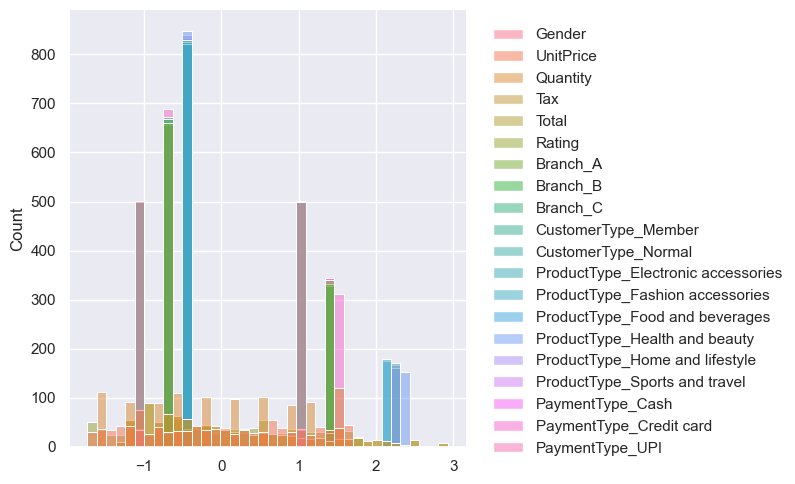

In [204]:
sns.set_theme(rc={'figure.figsize':(30, 20)})
sns.displot(scaled_df)

<Axes: >

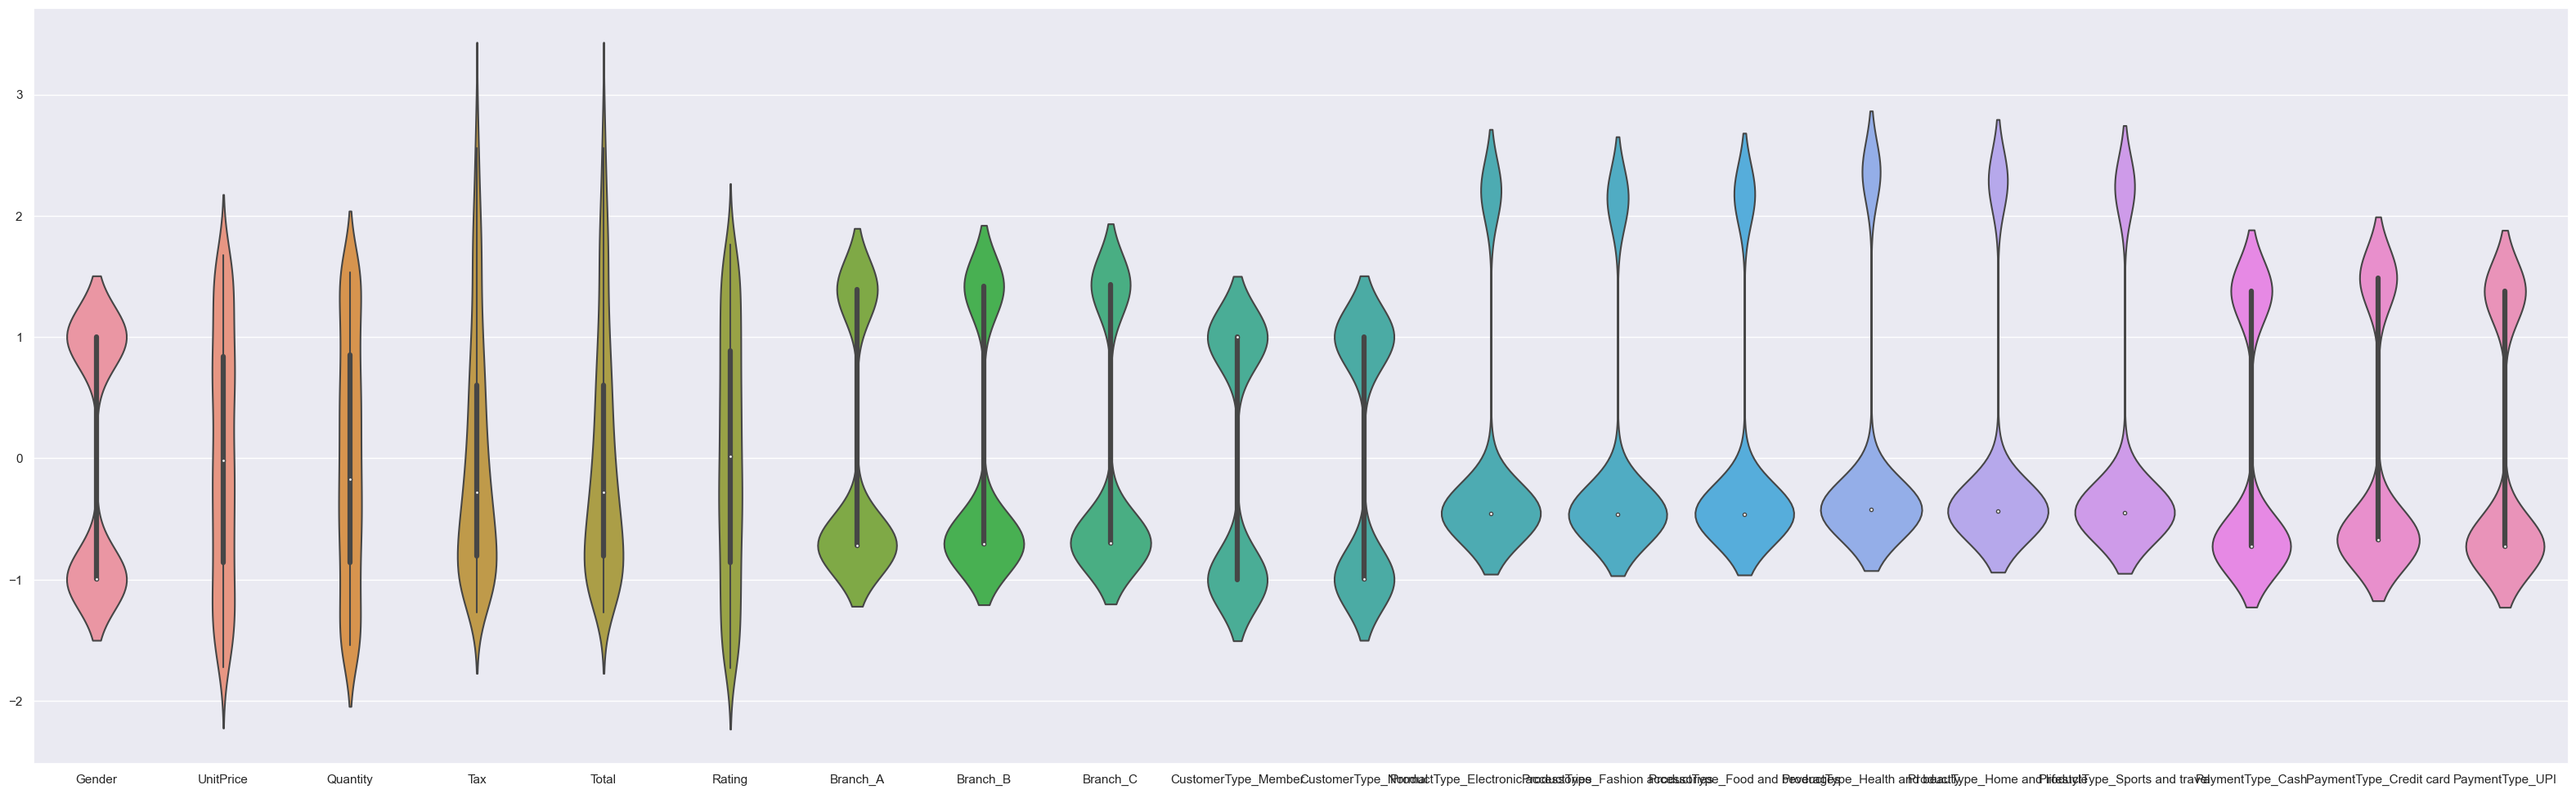

In [205]:
sns.set_theme(rc={'figure.figsize':(40,12)})
sns.violinplot(scaled_df)

<Axes: >

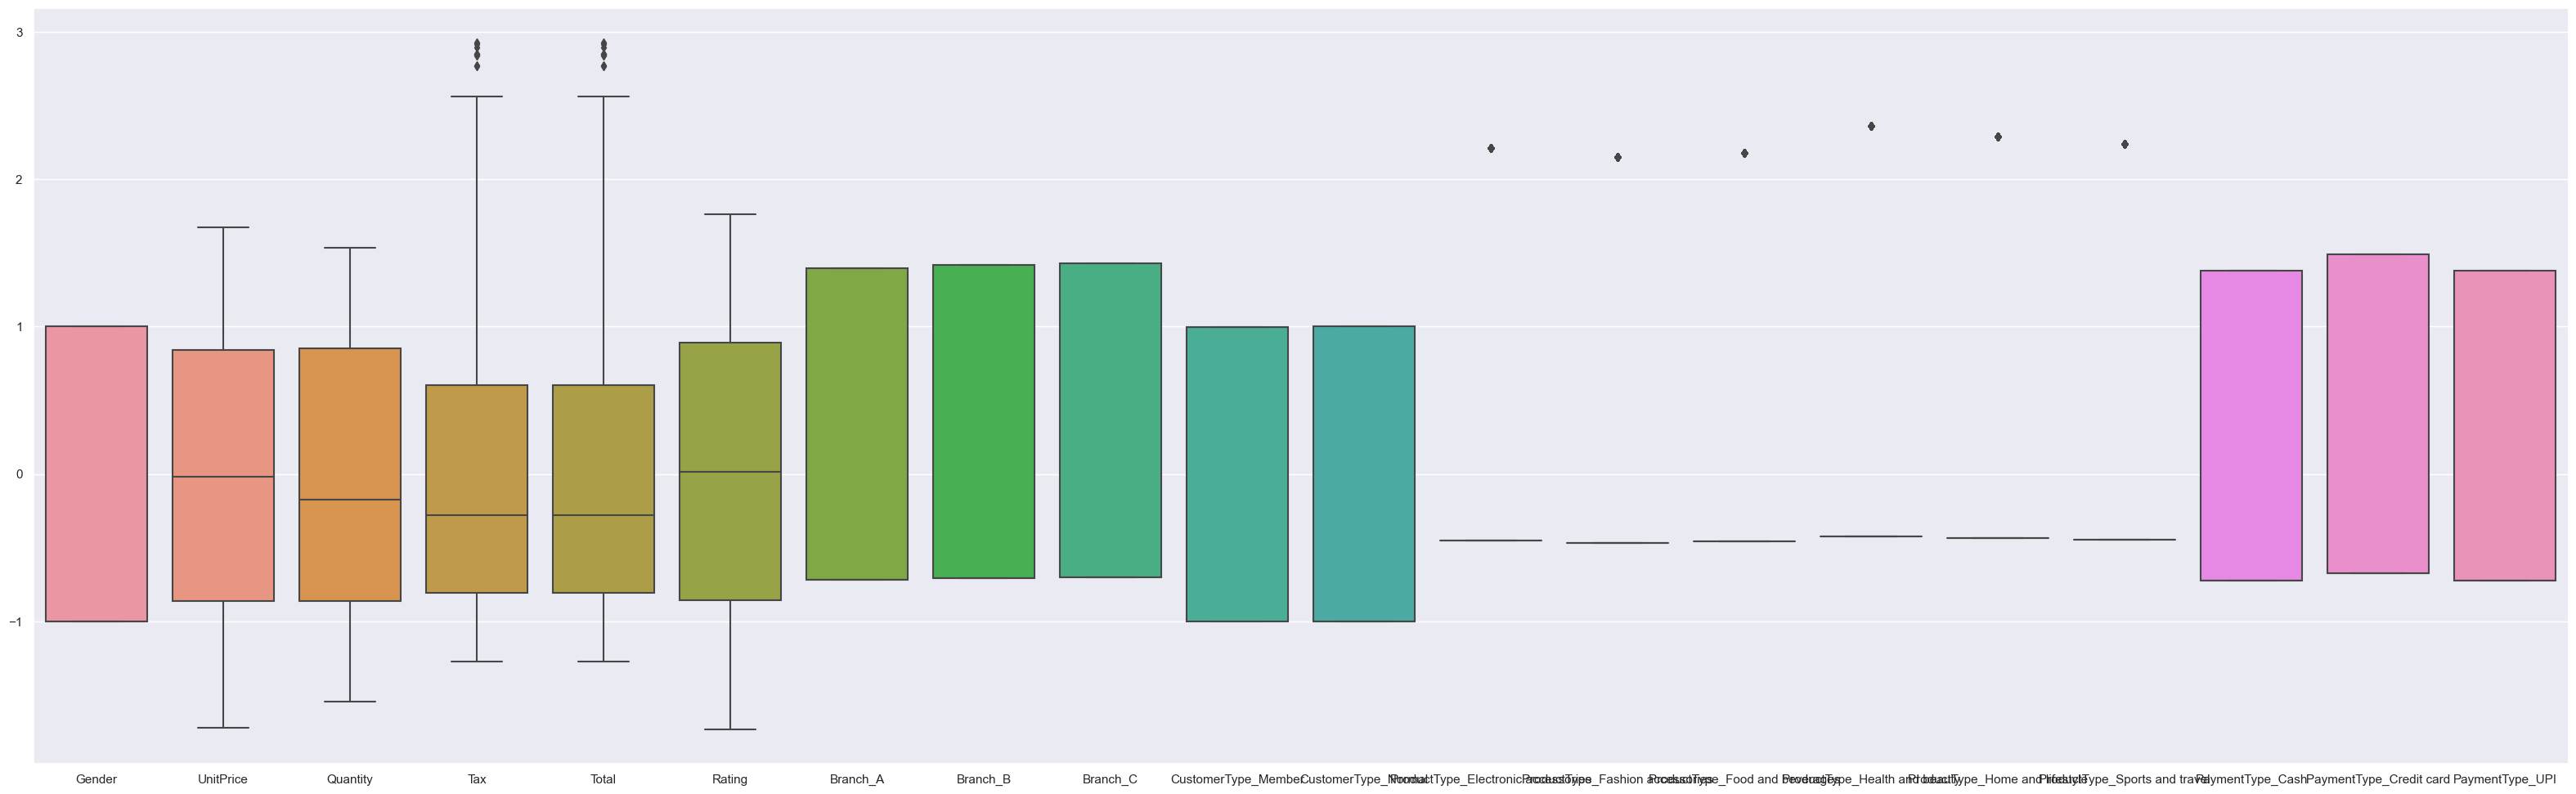

In [206]:
sns.boxplot(scaled_df)

#### Using DBScan

In [207]:
dbscan = DBSCAN(eps = 1,min_samples = 100)
model = dbscan.fit(scaled_df)
labels = model.labels_

# -1 value in anomaly_score column signifies that the data is anomalous
scaled_df["anomaly_score"] = labels
anomalies = scaled_df[scaled_df.anomaly_score == -1]
anomalies.shape

(1000, 21)

Outlier detected in features Tax and Total from plots

In [208]:
# IQR method on Tax
Q1 = np.percentile(df1['Tax'], 25, method='midpoint')
Q3 = np.percentile(df1['Tax'], 75, method='midpoint')
IQR = (Q3 - Q1)
print(IQR)
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

df1 = df1[df1['Tax'] <= upper]
print(df1.shape)
df1 = df1[df1['Tax'] >= lower]
print(df1.shape)

df1

16.56575
(991, 21)
(991, 21)


,InvoiceID,Gender,UnitPrice,Quantity,Tax,Total,Rating,Branch_A,Branch_B,Branch_C,...,CustomerType_Normal,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI
0,750-67-8428,0,74.69,7,26.1415,548.9715,9.1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,226-31-3081,0,15.28,5,3.8200,80.2200,9.6,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,631-41-3108,1,46.33,7,16.2155,340.5255,7.4,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,123-19-1176,1,58.22,8,23.2880,489.0480,8.4,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,373-73-7910,1,86.31,7,30.2085,634.3785,5.3,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,652-49-6720,0,60.95,1,3.0475,63.9975,5.9,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
995,233-67-5758,1,40.35,1,2.0175,42.3675,6.2,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
997,727-02-1313,1,31.84,1,1.5920,33.4320,7.7,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,347-56-2442,1,65.82,1,3.2910,69.1110,4.1,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [209]:
# IQR method on Total
Q1 = np.percentile(df1['Total'], 25, method='midpoint')
Q3 = np.percentile(df1['Total'], 75, method='midpoint')
IQR = (Q3 - Q1)
print(IQR)
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

df1 = df1[df1['Total'] <= upper]
print(df1.shape)
df1 = df1[df1['Total'] >= lower]
print(df1.shape)

df1

342.4995
(991, 21)
(991, 21)


,InvoiceID,Gender,UnitPrice,Quantity,Tax,Total,Rating,Branch_A,Branch_B,Branch_C,...,CustomerType_Normal,ProductType_Electronic accessories,ProductType_Fashion accessories,ProductType_Food and beverages,ProductType_Health and beauty,ProductType_Home and lifestyle,ProductType_Sports and travel,PaymentType_Cash,PaymentType_Credit card,PaymentType_UPI
0,750-67-8428,0,74.69,7,26.1415,548.9715,9.1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,226-31-3081,0,15.28,5,3.8200,80.2200,9.6,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,631-41-3108,1,46.33,7,16.2155,340.5255,7.4,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,123-19-1176,1,58.22,8,23.2880,489.0480,8.4,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,373-73-7910,1,86.31,7,30.2085,634.3785,5.3,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,652-49-6720,0,60.95,1,3.0475,63.9975,5.9,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
995,233-67-5758,1,40.35,1,2.0175,42.3675,6.2,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
997,727-02-1313,1,31.84,1,1.5920,33.4320,7.7,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,347-56-2442,1,65.82,1,3.2910,69.1110,4.1,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


Outliers are now removed

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import PolynomialFeatures, Normalizer